In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [6]:
dataset_dir = "/Users/MA_Arash/MA_git/EIT_Thigh_Force_Estimation/Data"
npz_files = [f for f in os.listdir(dataset_dir) if f.endswith('.npz')]
len(npz_files)

18635

## Classification between three classes [Low, Medium, High forces] 

In [7]:
## [20-40] --> Low
## [40-60] --> Medium
## [60-80] --> High
def categorize_target_force(target_force):
    if target_force <= 40:
        return 0  # Small
    elif target_force <= 60:
        return 1  # Middle
    else:
        return 2  # High

### Extract the data from `.npz` files

In [8]:
X = list()
y = list()

for file in npz_files:
    file_path = os.path.join(dataset_dir, file)
    data = np.load(file_path)
    
    eit_data = data['eit']
    target_force = data['target_force']
    
    # flatten the eit data
    eit_data_flat = eit_data.reshape(-1)
    
    X.append(eit_data_flat)
    y.append(categorize_target_force(target_force))

X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} samples, each with {X.shape[1]} features")


Loaded 18635 samples, each with 256 features


## SVM Method

SVM Accuracy: 0.97


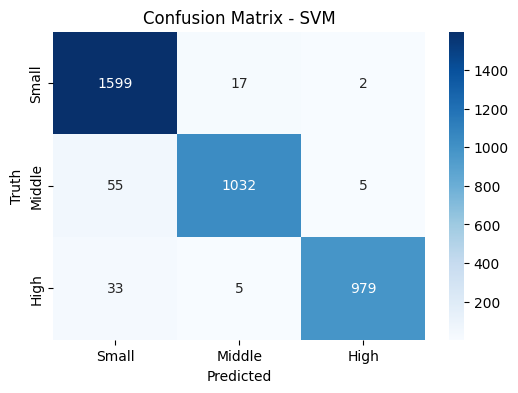

              precision    recall  f1-score   support

       Small       0.95      0.99      0.97      1618
      Middle       0.98      0.95      0.96      1092
        High       0.99      0.96      0.98      1017

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# Initialize and train SVM model
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM accuracy on the test set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

# Confusion matrix for SVM (only on test set)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Small", "Middle", "High"], yticklabels=["Small", "Middle", "High"])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - SVM')
plt.show()

print(classification_report(y_test, y_pred_svm, target_names=["Small", "Middle", "High"]))

## Random Forest classification

Random Forest Accuracy: 1.00


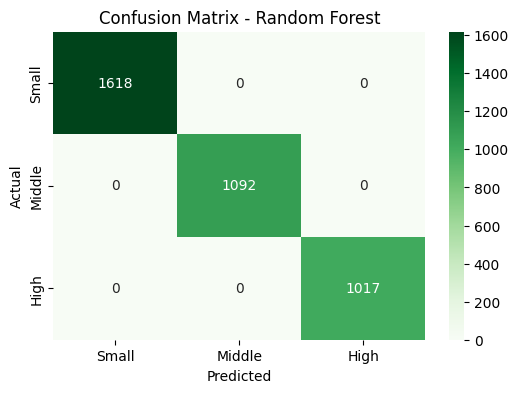

              precision    recall  f1-score   support

       Small       1.00      1.00      1.00      1618
      Middle       1.00      1.00      1.00      1092
        High       1.00      1.00      1.00      1017

    accuracy                           1.00      3727
   macro avg       1.00      1.00      1.00      3727
weighted avg       1.00      1.00      1.00      3727



In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Small", "Middle", "High"], yticklabels=["Small", "Middle", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print(classification_report(y_test, y_pred_rf, target_names=["Small", "Middle", "High"]))

## Classification for 7 Target force levels

In [ ]:
X_all_target = list()
y_all_target = list()

for file in npz_files:
    file_path = os.path.join(dataset_dir, file)
    data = np.load(file_path)
    
    eit_data = data['eit']
    target_force = data['target_force']
    
    # flatten the eit data
    eit_data_flat = eit_data.reshape(-1)
    
    X_all_target.append(eit_data_flat)
    y_all_target.append(target_force)

X_all_target = np.array(X_all_target)
y_all_target = np.array(y_all_target)

print(f"Loaded {len(X_all_target)} samples, each with {X_all_target.shape[1]} features")

Loaded 18635 samples, each with 256 features


In [26]:
target_force = data['target_force']
target_force

array(70)

SVM Accuracy: 0.99


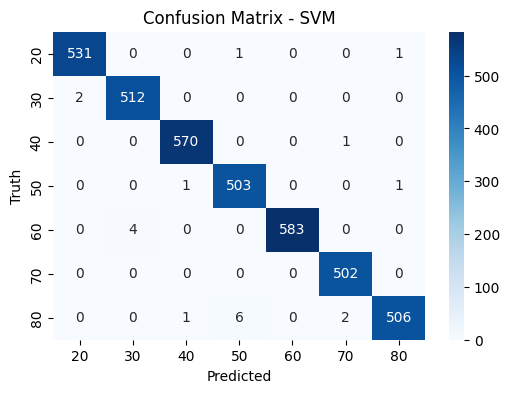

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       533
          30       0.99      1.00      0.99       514
          40       1.00      1.00      1.00       571
          50       0.99      1.00      0.99       505
          60       1.00      0.99      1.00       587
          70       0.99      1.00      1.00       502
          80       1.00      0.98      0.99       515

    accuracy                           0.99      3727
   macro avg       0.99      0.99      0.99      3727
weighted avg       0.99      0.99      0.99      3727



In [22]:
# SVM
X_all_t_train, X_all_t_test, y_all_t_train, y_all_t_test = train_test_split(X_all_target, y_all_target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_all_t_train = scaler.fit_transform(X_all_t_train) 
X_all_t_test = scaler.transform(X_all_t_test) 

# Initialize and train SVM model
svm_model = SVC(kernel='linear')  
svm_model.fit(X_all_t_train, y_all_t_train)

# Make predictions on the test set
y_pred_svm_all = svm_model.predict(X_all_t_test)

# Evaluate SVM accuracy on the test set
accuracy_svm_all = accuracy_score(y_all_t_test, y_pred_svm_all)
print(f'SVM Accuracy: {accuracy_svm_all:.2f}')

# Confusion matrix for SVM (only on test set)
cm_svm = confusion_matrix(y_all_t_test, y_pred_svm_all)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["20", "30", "40", "50", "60", "70", "80"], yticklabels=["20", "30", "40", "50", "60", "70", "80"])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - SVM')
plt.show()

print(classification_report(y_all_t_test, y_pred_svm_all, target_names=["20", "30", "40", "50", "60", "70", "80"]))

Random Forest Accuracy: 1.00


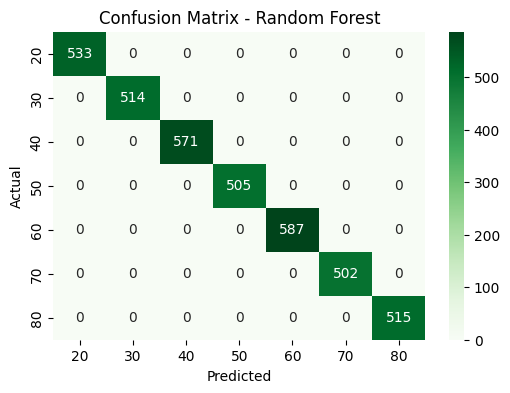

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       533
          30       1.00      1.00      1.00       514
          40       1.00      1.00      1.00       571
          50       1.00      1.00      1.00       505
          60       1.00      1.00      1.00       587
          70       1.00      1.00      1.00       502
          80       1.00      1.00      1.00       515

    accuracy                           1.00      3727
   macro avg       1.00      1.00      1.00      3727
weighted avg       1.00      1.00      1.00      3727



In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_all_t_train, y_all_t_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_all_t_test)

# Evaluate Random Forest accuracy
accuracy_rf = accuracy_score(y_all_t_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_all_t_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["20", "30", "40", "50", "60", "70", "80"], yticklabels=["20", "30", "40", "50", "60", "70", "80"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print(classification_report(y_all_t_test, y_pred_rf, target_names=["20", "30", "40", "50", "60", "70", "80"]))